In [13]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import seaborn as sb
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [23]:
#reading data from csv file that is in same directory as python process
col_list = ["Age (y)","Gender(1, male; 2, female)","BMI(kg/m2)","censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)",
            "drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"]
data1= pd.read_csv("RC Health Care Data-20180820.csv",usecols=col_list)
data1

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),"censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [24]:
# changing columns using .columns() 
data1.columns = ['Age', 'Gender', 'BMI', 'Outcome', 
                'smoking', 'drinking', 'family']
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [6]:
data1.describe()

,Age,Gender,BMI,Outcome,smoking,drinking,family
count,211833.000000,211833.000000,211833.000000,211833.000000,60230.000000,60230.000000,211833.000000
mean,42.097567,1.451818,23.235742,0.019704,2.556550,2.806442,0.020507
std,12.649956,0.497674,3.342934,0.138982,0.804845,0.448283,0.141726
min,20.000000,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,1.000000,20.800000,0.000000,3.000000,3.000000,0.000000
50%,39.000000,1.000000,23.000000,0.000000,3.000000,3.000000,0.000000
75%,50.000000,2.000000,25.380000,0.000000,3.000000,3.000000,0.000000
max,99.000000,2.000000,52.700000,1.000000,3.000000,3.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


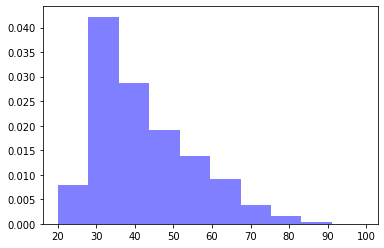

In [8]:
num_bins = 10
plt.hist(data1['Age'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

In [10]:
data1.isnull().sum()

Age              0
Gender           0
BMI              0
Outcome          0
smoking     151603
drinking    151603
family           0
dtype: int64

In [17]:
data1=data1.dropna()
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
3,59,1,23.1,0,3.0,3.0,0
9,31,1,22.4,0,3.0,3.0,0
16,25,2,20.3,0,3.0,3.0,0
19,66,1,24.9,0,1.0,3.0,0
...,...,...,...,...,...,...,...
211799,38,1,24.3,0,2.0,3.0,0
211806,57,1,25.1,0,1.0,3.0,0
211812,31,2,22.9,0,3.0,3.0,0
211826,68,2,28.4,0,3.0,3.0,0


In [18]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60230 entries, 0 to 211832
Data columns (total 7 columns):
Age         60230 non-null int64
Gender      60230 non-null int64
BMI         60230 non-null float64
Outcome     60230 non-null int64
smoking     60230 non-null float64
drinking    60230 non-null float64
family      60230 non-null int64
dtypes: float64(3), int64(4)
memory usage: 3.7 MB
None


In [19]:
data1
#groupby and size is used to return the class count of the target variable
class_count=data1.groupby('Outcome').size()
print(class_count)

Outcome
0    59058
1     1172
dtype: int64


In [32]:
count_class_0, count_class_1 = data1.Outcome.value_counts()
df_class_0 = data1[data1['Outcome'] == 0]
df_class_1 = data1[data1['Outcome'] == 1]

Random under-sampling:
1    1172
0    1172
Name: Outcome, dtype: int64


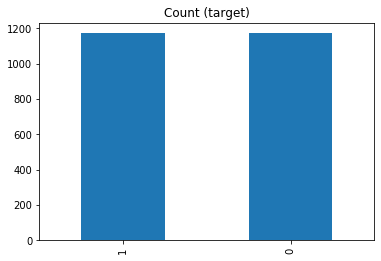

In [33]:
#performing random under sampling to overcome the biased nature of the model
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())
#plot that gives the count of each class
df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (target)')

In [34]:
#target variable after sampling
y_sample= df_test_under.Outcome
#features after sampling
X_sample=df_test_under.drop('Outcome', axis=1)
y_sample

143730    0
79410     0
3864      0
96808     0
145098    0
         ..
211159    1
211313    1
211395    1
211655    1
211832    1
Name: Outcome, Length: 2344, dtype: int64

In [35]:
X_sample

,Age,Gender,BMI,smoking,drinking,family
143730,78,2,20.7,3.0,3.0,0
79410,44,1,20.5,1.0,3.0,0
3864,38,1,22.9,3.0,3.0,0
96808,40,2,19.0,3.0,3.0,0
145098,31,1,26.9,3.0,3.0,0
...,...,...,...,...,...,...
211159,69,1,20.8,3.0,3.0,0
211313,71,2,27.7,3.0,3.0,0
211395,69,1,24.9,3.0,3.0,0
211655,50,1,23.6,3.0,3.0,0


In [36]:
X = np.column_stack((X_sample['Age'],X_sample['Gender'],X_sample['BMI'],X_sample['drinking'],
                    X_sample['smoking'],X_sample['family'])
                   )
print(X)

[[78.   2.  20.7  3.   3.   0. ]
 [44.   1.  20.5  3.   1.   0. ]
 [38.   1.  22.9  3.   3.   0. ]
 ...
 [69.   1.  24.9  3.   3.   0. ]
 [50.   1.  23.6  3.   3.   0. ]
 [57.   1.  27.7  2.   1.   0. ]]


In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(X)
scaled_trainingset

array([[0.80882353, 1.        , 0.16600791, 1.        , 1.        ,
        0.        ],
       [0.30882353, 0.        , 0.15810277, 1.        , 0.        ,
        0.        ],
       [0.22058824, 0.        , 0.25296443, 1.        , 1.        ,
        0.        ],
       ...,
       [0.67647059, 0.        , 0.33201581, 1.        , 1.        ,
        0.        ],
       [0.39705882, 0.        , 0.28063241, 1.        , 1.        ,
        0.        ],
       [0.5       , 0.        , 0.44268775, 0.5       , 0.        ,
        0.        ]])

In [38]:
X = array(scaled_trainingset).reshape(2344, 1, 6)
X

array([[[0.80882353, 1.        , 0.16600791, 1.        , 1.        ,
         0.        ]],

       [[0.30882353, 0.        , 0.15810277, 1.        , 0.        ,
         0.        ]],

       [[0.22058824, 0.        , 0.25296443, 1.        , 1.        ,
         0.        ]],

       ...,

       [[0.67647059, 0.        , 0.33201581, 1.        , 1.        ,
         0.        ]],

       [[0.39705882, 0.        , 0.28063241, 1.        , 1.        ,
         0.        ]],

       [[0.5       , 0.        , 0.44268775, 0.5       , 0.        ,
         0.        ]]])

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y_sample, test_size=0.20, random_state=42)
x_train.shape

(1875, 1, 6)

In [111]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 6),return_sequences=True))
model.add(LSTM(27, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 1, 50)             11400     
_________________________________________________________________
lstm_57 (LSTM)               (None, 27)                8424      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 28        
Total params: 19,852
Trainable params: 19,852
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
model.fit(x_train,y_train, epochs=49, batch_size=5, validation_data=(x_test, y_test))

Epoch 1/49
375/375 [==============================] - 2s 6ms/step - loss: 0.6573 - accuracy: 0.6203 - val_loss: 0.5528 - val_accuracy: 0.7463
Epoch 2/49
375/375 [==============================] - 1s 3ms/step - loss: 0.5338 - accuracy: 0.7483 - val_loss: 0.5061 - val_accuracy: 0.7569
Epoch 3/49
375/375 [==============================] - 1s 3ms/step - loss: 0.5176 - accuracy: 0.7461 - val_loss: 0.5029 - val_accuracy: 0.7633
Epoch 4/49
375/375 [==============================] - 2s 4ms/step - loss: 0.5092 - accuracy: 0.7568 - val_loss: 0.5456 - val_accuracy: 0.7228
Epoch 5/49
375/375 [==============================] - 1s 3ms/step - loss: 0.5091 - accuracy: 0.7653 - val_loss: 0.4888 - val_accuracy: 0.7889
Epoch 6/49
375/375 [==============================] - 1s 2ms/step - loss: 0.5104 - accuracy: 0.7595 - val_loss: 0.4963 - val_accuracy: 0.7783
Epoch 7/49
375/375 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7552 - val_loss: 0.4831 - val_accuracy: 0.7910
Epoch 

In [113]:
y_pred_class_nn_1 = model.predict_classes(x_test)
y_pred_class_nn_1

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [114]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))

accuracy is 0.800


In [59]:
import joblib
from joblib import load
from joblib import dump

dump(min_max_scaler, "labelencoder1_X.joblib1.dat")

['labelencoder1_X.joblib1.dat']

In [65]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [90]:
dump(X[2343],"test_case1.joblib1.dat")
X[2343]

array([[0.5       , 0.        , 0.44268775, 0.5       , 0.        ,
        0.        ]])

In [115]:
#classification report for precision, recall and f1-score for both class
print('Classification Report:')
print(classification_report(y_test,y_pred_class_nn_1, labels=[0,1]))
confusion = metrics.confusion_matrix(y_test, y_pred_class_nn_1)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       234
           1       0.78      0.83      0.81       235

    accuracy                           0.80       469
   macro avg       0.80      0.80      0.80       469
weighted avg       0.80      0.80      0.80       469

[[180  54]
 [ 40 195]]


In [116]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class_nn_1))

0.7995735607675906
0.7995735607675906


In [117]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class_nn_1))

0.20042643923240938
0.20042643923240944


In [118]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class_nn_1))

0.8297872340425532
0.8297872340425532


In [119]:
specificity = TN / (TN + FP)

print(specificity)

0.7692307692307693


In [120]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.23076923076923078
0.23076923076923073


In [121]:
recall = TP / float(TP + FN)
print(recall)

0.8297872340425532


In [122]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class_nn_1))

0.7831325301204819
0.7831325301204819


In [123]:
f1score= 2*(recall * precision) / (recall + precision)
print(f1score)


0.805785123966942


In [74]:
feature_try = np.array([x_train[134]])
feature_try

array([[[0.41176471, 0.        , 0.36363636, 1.        , 1.        ,
         0.        ]]])

In [76]:
result = model.predict_classes(feature_try)
result

array([[1]])

In [126]:
import numpy
from sklearn.model_selection import StratifiedKFold
seed = 7

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y_sample):
  # create model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, 6),return_sequences=True))
    model.add(LSTM(27, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    model.fit(x_train,y_train, epochs=48, batch_size=5, validation_data=(x_test, y_test))

    # evaluate the mode
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 1, 50)             11400     
_________________________________________________________________
lstm_81 (LSTM)               (None, 27)                8424      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 28        
Total params: 19,852
Trainable params: 19,852
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/48
375/375 [==============================] - 7s 17ms/step - loss: 0.6282 - accuracy: 0.6800 - val_loss: 0.5254 - val_accuracy: 0.7207
Epoch 2/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7408 - val_loss: 0.4969 - val_accuracy: 0.7719
Epoch 3/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5133 - accura

Epoch 1/48
375/375 [==============================] - 3s 7ms/step - loss: 0.6536 - accuracy: 0.6432 - val_loss: 0.5555 - val_accuracy: 0.7313
Epoch 2/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5288 - accuracy: 0.7493 - val_loss: 0.4978 - val_accuracy: 0.7761
Epoch 3/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.7595 - val_loss: 0.4876 - val_accuracy: 0.7910
Epoch 4/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5085 - accuracy: 0.7621 - val_loss: 0.4971 - val_accuracy: 0.7740
Epoch 5/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.7627 - val_loss: 0.4863 - val_accuracy: 0.7804
Epoch 6/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5033 - accuracy: 0.7573 - val_loss: 0.4877 - val_accuracy: 0.7825
Epoch 7/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7627 - val_loss: 0.4747 - val_accuracy: 0.7996
Epoch 

Epoch 2/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7339 - val_loss: 0.5509 - val_accuracy: 0.7122
Epoch 3/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.7563 - val_loss: 0.5153 - val_accuracy: 0.7761
Epoch 4/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5156 - accuracy: 0.7541 - val_loss: 0.4936 - val_accuracy: 0.7825
Epoch 5/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5091 - accuracy: 0.7579 - val_loss: 0.4856 - val_accuracy: 0.7910
Epoch 6/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5065 - accuracy: 0.7632 - val_loss: 0.4835 - val_accuracy: 0.7974
Epoch 7/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5062 - accuracy: 0.7611 - val_loss: 0.4963 - val_accuracy: 0.7740
Epoch 8/48
375/375 [==============================] - 1s 3ms/step - loss: 0.5053 - accuracy: 0.7611 - val_loss: 0.4807 - val_accuracy: 0.7932
Epoch 

Epoch 6/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7664 - val_loss: 0.4922 - val_accuracy: 0.7783
Epoch 7/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7568 - val_loss: 0.4940 - val_accuracy: 0.7783
Epoch 8/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.7659 - val_loss: 0.5017 - val_accuracy: 0.7548
Epoch 9/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7632 - val_loss: 0.4809 - val_accuracy: 0.7910
Epoch 10/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.7648 - val_loss: 0.4741 - val_accuracy: 0.7996
Epoch 11/48
375/375 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7659 - val_loss: 0.4745 - val_accuracy: 0.7953
Epoch 12/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4982 - accuracy: 0.7632 - val_loss: 0.4807 - val_accuracy: 0.7868
Epo

Epoch 10/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4972 - accuracy: 0.7685 - val_loss: 0.4923 - val_accuracy: 0.7846
Epoch 11/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4966 - accuracy: 0.7696 - val_loss: 0.4707 - val_accuracy: 0.7996
Epoch 12/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.7552 - val_loss: 0.4762 - val_accuracy: 0.7889
Epoch 13/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4947 - accuracy: 0.7659 - val_loss: 0.4677 - val_accuracy: 0.7974
Epoch 14/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4937 - accuracy: 0.7696 - val_loss: 0.4680 - val_accuracy: 0.7996
Epoch 15/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.7691 - val_loss: 0.4829 - val_accuracy: 0.7889
Epoch 16/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7648 - val_loss: 0.4648 - val_accuracy: 0.7974

Epoch 14/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4989 - accuracy: 0.7653 - val_loss: 0.4715 - val_accuracy: 0.7974
Epoch 15/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7621 - val_loss: 0.4696 - val_accuracy: 0.7996
Epoch 16/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.7605 - val_loss: 0.4718 - val_accuracy: 0.7996
Epoch 17/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7680 - val_loss: 0.4684 - val_accuracy: 0.7974
Epoch 18/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7675 - val_loss: 0.4972 - val_accuracy: 0.7633
Epoch 19/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.7680 - val_loss: 0.4801 - val_accuracy: 0.7825
Epoch 20/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7632 - val_loss: 0.4727 - val_accuracy: 0.7910

Epoch 18/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.7659 - val_loss: 0.4750 - val_accuracy: 0.7825
Epoch 19/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7696 - val_loss: 0.4664 - val_accuracy: 0.7996
Epoch 20/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.7675 - val_loss: 0.4720 - val_accuracy: 0.7953
Epoch 21/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4898 - accuracy: 0.7653 - val_loss: 0.4738 - val_accuracy: 0.7910
Epoch 22/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4898 - accuracy: 0.7680 - val_loss: 0.4690 - val_accuracy: 0.7932
Epoch 23/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4882 - accuracy: 0.7659 - val_loss: 0.4680 - val_accuracy: 0.7953
Epoch 24/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7701 - val_loss: 0.4755 - val_accuracy: 0.7910

Epoch 22/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7675 - val_loss: 0.4686 - val_accuracy: 0.7953
Epoch 23/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4876 - accuracy: 0.7712 - val_loss: 0.4777 - val_accuracy: 0.7846
Epoch 24/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4858 - accuracy: 0.7712 - val_loss: 0.4687 - val_accuracy: 0.7996
Epoch 25/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4871 - accuracy: 0.7669 - val_loss: 0.4673 - val_accuracy: 0.7996
Epoch 26/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4854 - accuracy: 0.7717 - val_loss: 0.4648 - val_accuracy: 0.7996
Epoch 27/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7712 - val_loss: 0.4656 - val_accuracy: 0.7996
Epoch 28/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7685 - val_loss: 0.4683 - val_accuracy: 0.7974

Epoch 26/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4914 - accuracy: 0.7669 - val_loss: 0.4801 - val_accuracy: 0.7804
Epoch 27/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7643 - val_loss: 0.4705 - val_accuracy: 0.8038
Epoch 28/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.7664 - val_loss: 0.4661 - val_accuracy: 0.7996
Epoch 29/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4896 - accuracy: 0.7653 - val_loss: 0.4650 - val_accuracy: 0.7996
Epoch 30/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.7680 - val_loss: 0.4705 - val_accuracy: 0.7953
Epoch 31/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7611 - val_loss: 0.4692 - val_accuracy: 0.7996
Epoch 32/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4875 - accuracy: 0.7664 - val_loss: 0.4656 - val_accuracy: 0.8038

Epoch 30/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4854 - accuracy: 0.7696 - val_loss: 0.4687 - val_accuracy: 0.7974
Epoch 31/48
375/375 [==============================] - 1s 3ms/step - loss: 0.4878 - accuracy: 0.7659 - val_loss: 0.4670 - val_accuracy: 0.8017
Epoch 32/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.7653 - val_loss: 0.4671 - val_accuracy: 0.7974
Epoch 33/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7691 - val_loss: 0.4743 - val_accuracy: 0.7889
Epoch 34/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.7696 - val_loss: 0.4993 - val_accuracy: 0.7655
Epoch 35/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4890 - accuracy: 0.7589 - val_loss: 0.4662 - val_accuracy: 0.8060
Epoch 36/48
375/375 [==============================] - 1s 2ms/step - loss: 0.4858 - accuracy: 0.7685 - val_loss: 0.4875 - val_accuracy: 0.7740